In [1]:
import geopandas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geocoder
from time import sleep

In [3]:
%matplotlib inline

In [4]:
import seaborn as sns
sns.set(style="ticks", palette="Set2")

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
cd

/Users/mmngreco


In [6]:
pwd

'/Users/mmngreco'

In [7]:
%%HTML
<iframe src="https://mapsengine.google.com/map/embed?mid=zTtXepJtMlLc.k6VXMPFTI7DI" width="640" height="480"></iframe>

En los mapas físicos, las coordenadas están expresadas en grados, así que la posición de Puerto Rico sería:
18°14’70” N  66°29’68” W

La forma de convertir estos datos a decimales sería:

$(18°14’70” N) = (18 + (14 / 60) + (70 / 3600)) = 18.252$

$(66°29’68” W) = -(66 + (29 / 60) + (68 / 3600)) = -66.8627$

La longitud se multiplica por negativo, porque está a la izquierda (oeste) del punto 0,0. Para esta guía solo vamos a estar trabajando con decimales.

In [10]:
url = 'https://en.wikipedia.org/wiki/ISO_3166-2:ES'

In [11]:
# obtener códigos ISO:
ca_iso, prov_iso = pd.read_html(url, header=0, encoding='Latin')[:2]


In [12]:
prov_iso.columns = 'codigo nombre ca'.split()
ca_iso.drop(ca_iso.columns[-1], axis=1, inplace=True)
ca_iso.columns = 'codigo ca'.split()

# EN R 

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%R -o data data <- readRDS("Downloads/ESP_adm1-2.rds")

In [ ]:
%%R
plot(data[1])

# ELECCIÓN (OFERTA)

In [15]:
# PRUEBA 
# COORDENADAS DE LAS LOCALIDADES

localidades = ['zaragoza', 'oviedo', 'huesca', 'madrid', 'bilbao']
coords = dict()

for loc in localidades:

    g = geocoder.google(loc)
    
    print('city', g.json['city'])
    print('state', g.json['state'])
    print('address', g.json['address'])
    print('county', g.json['county'])

    lat = g.json['lat']
    lng = g.json['lng']

    print(loc, lat, lng, np.sqrt(lat ** 2 + lng ** 2))

    coords[loc] = [lat, lng]

city Zaragoza
state Aragon
address Zaragoza, Zaragoza, Spain
county Z
zaragoza 41.6488226 -0.8890853 41.6583112552
city Oviedo
state Principado de Asturias
address Oviedo, Asturias, Spain
county O
oviedo 43.3619145 -5.8493887 43.7546680626
city Huesca
state Aragon
address Huesca, Huesca, Spain
county Huesca
huesca 42.131845 -0.4078058 42.1338185864
city Madrid
state Community of Madrid
address Madrid, Madrid, Spain
county M
madrid 40.4167754 -3.7037902 40.5861281176
city Bilbao
state PV
address Bilbao, Biscay, Spain
county BI
bilbao 43.2630126 -2.9349852 43.3624537746


In [20]:
pd.DataFrame.from_dict(coords)

,bilbao,huesca,madrid,oviedo,zaragoza
0,43.263013,42.131845,40.416775,43.361914,41.648823
1,-2.934985,-0.407806,-3.703790,-5.849389,-0.889085


In [21]:
_.T

,0,1
bilbao,43.263013,-2.934985
huesca,42.131845,-0.407806
madrid,40.416775,-3.703790
oviedo,43.361914,-5.849389
zaragoza,41.648823,-0.889085


In [22]:
_.reset_index()

,index,0,1
0,bilbao,43.263013,-2.934985
1,huesca,42.131845,-0.407806
2,madrid,40.416775,-3.703790
3,oviedo,43.361914,-5.849389
4,zaragoza,41.648823,-0.889085


# PROBLEMA 

# $$\text{Min:} \sum{c_i · w_i · d_i}$$

In [ ]:
wi = np.array(list(map(np.mean, clientes)))
ci = np.random.uniform(0.2, 1, size=len(clientes))
#di = np.array(list(distancias.values()))

# QUE ES LO QUE SE MINIMIZA???
# PROBLEMA DE TRANSPORTE
# ELEGIMOS COORDENADAS


# DEMANDA

SERIE TEMPORAL TIPO:

## $$y_t = \delta_0 + \delta_1 · t + u_t$$

### Donde:
- $y_t$ : Ventas para cada período t.
- $\delta_0$ : Ventas indendientes o autónomas. (Stock de Seguridad pe.)
- $\delta_1$ : Pendiente la recta.
- $u_t$ : Ruido ~ N(0, 5)

En este caso para darle más realismo, $\delta_0 = \delta_a + \delta_b · sin(x)$, de esta forma introducimos un posible componente estacional, que depende cuán grande sea $\delta_b$.

In [ ]:
clientes = dict()
year = 365
nperiodos = 3 * year
tiempo = np.linspace(0 , 12*3, nperiodos)

for c in range(5):

    pendiente = np.random.uniform(0.5, 8)
    ruido = np.random.normal(0, 5, nperiodos)
    freq = np.random.normal(10, 10)
    demanda_a = np.random.normal(1000, 10)
    band = np.random.uniform() < 0.3
    demanda = demanda_a + (np.cos(tiempo)*band + np.sin(tiempo)*(1-band)) * freq + pendiente * tiempo + ruido
    cname = 'cliente %s' % (c+1)
    clientes[cname] = demanda

    plt.plot(demanda, alpha=0.8, label=cname)

sns.despine()
plt.legend(loc=2)
tlabel = pd.date_range(end='2015-12-31', periods=nperiodos, freq='D')
plt.xlabel('TIEMPO')
plt.xticks(range(0, len(tiempo), 60), [t.date() for t in tlabel[0::60]], rotation=90)
plt.ylabel('DEMANDA')

# MUESTREO ALEATORIO SIMPLE 
---


In [63]:
# montecarlo
nobs = np.sqrt(1500)

xmin, xmax = -9.7, 3.5

ymax = 43.7
ymin = 35.9

xs = np.repeat(np.linspace(xmin, xmax, nobs), nobs)
ys = list(np.linspace(ymin, ymax, nobs)) * nobs
ys = np.array(ys).flatten()


/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


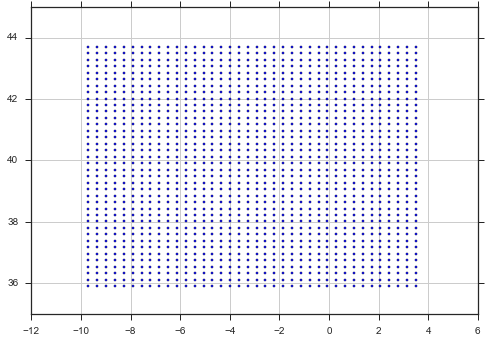

In [65]:
plt.scatter(xs, ys, marker='.')
plt.gca().grid(True)

# MONTECARLO

In [71]:
# googlemaps

montecarlo = {}
n=0

for x in zip(ys,xs):
    g = geocoder.google(x, method='reverse', )

    n += 1
    print(n, end=' ')

    try:
        loc = '%s: %s: %s' % (g.json['country'], g.json['state'], g.json['county'])

    except:
        continue

    lat = g.json['lat']
    lng = g.json['lng']
    coordenadas = [list(x)]
    montecarlo[loc] = montecarlo.get(loc, coordenadas) + coordenadas

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [ ]:
mapquest_api = open('Documents/mq_api.txt').read()
gmaps_api = open('Documents/googlemaps_api.txt').read()
geocoder_api = open('Documents/geocoder_api.txt').read()
mbox_api = open('Documents/mbox_api.txt').read()

In [ ]:
prov_iso.head(), ca_iso.head()

In [72]:
fname = 'Documents/repos/unizar/SIAD/Trabajo Grupo/xys_pais_ca_prov_rejilla.csv'
f = open(fname, 'w')
for key, xys in montecarlo.items():
    for xy in xys:
        print('%s,%s,%s,%s,%s' % (*key.split(': '), *xy), file=f)

f.close()

# MAPA

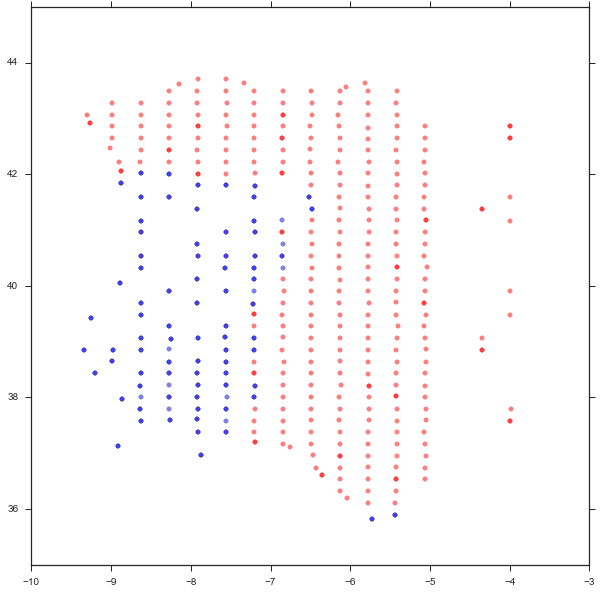

In [73]:
plt.figure(figsize=(10,10))
for k, cs in montecarlo.items():
    x = [c[0] for c in cs]
    y = [c[1] for c in cs]

    if k.startswith('ES'):
        plt.scatter(y, x, color='red', marker='o', alpha=0.5)
    else:
        plt.scatter(y, x, alpha=0.5)

#plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# EXPORTAR DATOS

In [66]:
file_name = 'Documents/repos/unizar/SIAD/Trabajo Grupo/xys_backup.csv'

In [28]:
f = open(file_name, 'a')
for name, xys in montecarlo.items():
    for xy in xys:
        print('%s,%s,%s' % (name, *xy), file=f)
f.close()

In [71]:
xys = pd.read_csv(file_name, header=0)

In [72]:
xys.head()

,label,x,y,pais,prov
0,PT: Guarda,40.584424,-7.071507,PT,Guarda
1,PT: Guarda,40.873682,-6.974773,PT,Guarda
2,PT: Guarda,40.672291,-7.372391,PT,Guarda
3,PT: Guarda,40.328959,-7.209127,PT,Guarda
4,PT: Guarda,40.348149,-6.900154,PT,Guarda


In [69]:
xys.columns = ['label', 'x', 'y']

ValueError: Length mismatch: Expected axis has 5 elements, new values have 3 elements

In [31]:
xys['pais'] = xys['label'].apply(lambda x: x[:2])

In [32]:
xys['prov'] = xys['label'].apply(lambda x: x.split(': ')[1])

In [33]:
xys[xys.pais == 'ES'].prov.unique()

array(['Región de Murcia', 'Comunidad Valenciana', 'AL', 'CL', 'Navarra',
       'Principado de Asturias', 'Cantabria', 'GA', 'Comunidad de Madrid',
       'PV', 'PM', 'CM', 'CT', 'EX', 'La Rioja', 'Aragón', 'CE'], dtype=object)

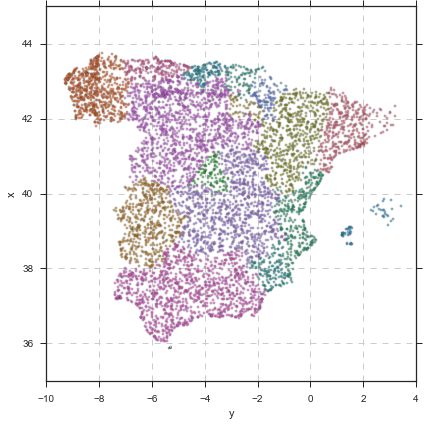

In [73]:
plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1)

#xys[xys.pais == 'ES'].plot(kind='scatter', x='y', y='x', alpha=0.6, ax=ax)

color = sns.color_palette("Set1", 17)
color = sns.color_palette("husl", 17)
#color = sns.color_palette("cubehelix", 17)


n_color = list(map(int,'9  7 15 14 12 16 10  1  6  8 11 13  0  2  3  4  5'.split()))

for i, region in enumerate(xys[xys.pais == 'ES'].prov.unique()):
    i = n_color[i]
    xys[xys.prov == region].plot(kind='scatter', 
                                 x='y', 
                                 y='x', 
                                 alpha=0.6, 
                                 ax=ax, 
                                 color=color[i], 
                                 marker='.')

plt.xlim(-10,4)
ax.grid(True, linestyle='--')
plt.tight_layout()

In [74]:
ca = xys[xys.pais == 'ES'].prov.unique()

In [75]:
ns = list(filter(lambda x: len(x) < 3, ca))
ns

['AL', 'CL', 'GA', 'PV', 'PM', 'CM', 'CT', 'EX', 'CE']

In [76]:
dic_ca  = dict(zip(list(map(lambda x: x[3:], ca_iso.codigo.values)), list(ca_iso.ca.values)))
dic_prov = dict(zip(list(prov_iso.codigo.apply(lambda x: x.replace('ES-', '')).values), list(prov_iso.nombre.values)))

In [77]:
dic_names = dict()
dic_names.update(dic_ca)
dic_names.update(dic_prov)

[dic_names[n] for n in ns]

['Almería',
 'Castilla y León',
 'Galicia (gl) [Galicia]',
 'País Vasco Euskal Herria (eu)',
 'Balears (ca) [Baleares]',
 'Castilla La Mancha !\xa0Castilla-La Mancha',
 'Catalunya (ca) [Cataluña]',
 'Extremadura',
 'Ceuta']

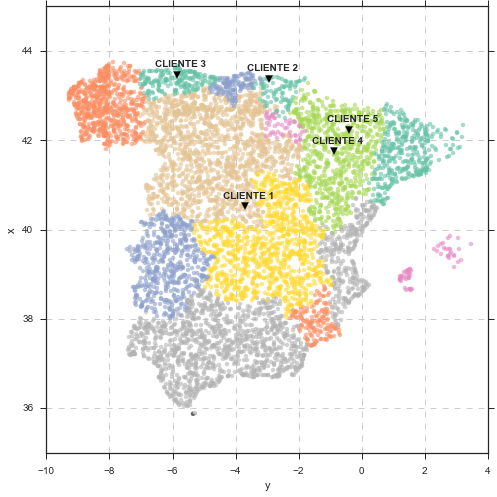

In [79]:
plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)

#xys[xys.pais == 'ES'].plot(kind='scatter', x='y', y='x', alpha=0.6, ax=ax)

color = sns.color_palette("Set2", 17)
#color = sns.color_palette("husl", 17)
#color = sns.color_palette("cubehelix", 17)


n_color = list(map(int,'9  7 15 14 12 16 10  1  6  8 11 13  0  2  3  4  5'.split()))

# TERRITORIO

for i, region in enumerate(xys[xys.pais == 'ES'].prov.unique()):
    i = n_color[i]
    xys[xys.prov == region].plot(kind='scatter', 
                                 x='y', 
                                 y='x', 
                                 alpha=0.6, 
                                 ax=ax, 
                                 color=color[i], 
                                 marker='o',
                                 linewidths=0)
# CLIENTES
for i, (y, x) in enumerate(coords.values()):

    plt.scatter(x,y*1.0025, color='black', marker='v', s=50)
    plt.text(x - 0.7,
             y * 1.007,
             'CLIENTE %s' % (i+1), weight='bold')
#    plt.axhline(y, linestyle='--', alpha=0.5, c='r')

plt.xlim(-10,4)
ax.grid(True, linestyle='--')
plt.tight_layout()

In [62]:
xys.duplicated().head()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [64]:
xys.drop_duplicates(inplace=True)

In [65]:
xys.to_csv('Documents/repos/unizar/SIAD/Trabajo Grupo/xys_backup.csv', index=False)